### K-means

In [17]:
import numpy as np
import pandas as pd
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],   
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]    }

In [6]:
df = DataFrame(Data, columns = ['x', 'y'])

In [7]:
df.shape

(30, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
x    30 non-null int64
y    30 non-null int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [9]:
df.describe()

,x,y
count,30.000000,30.000000
mean,42.633333,43.200000
std,12.220625,22.932284
min,22.000000,5.000000
25%,33.250000,25.500000
50%,43.500000,48.500000
75%,50.750000,58.750000
max,67.000000,79.000000


In [10]:
df.isna().sum()

x    0
y    0
dtype: int64

[[47.07142857 22.14285714]
 [38.75       61.625     ]]


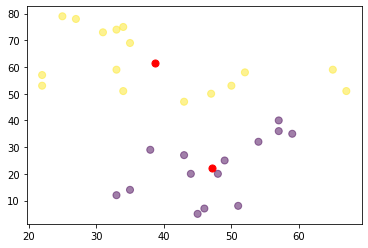

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

#### Let's apply KMeans on IRIS data set

In [57]:
df = pd.read_csv('logistic_reg_Iris.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
df.drop(['Id'], axis=1, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [62]:
target = df.Species

In [63]:
df.drop(['Species'], axis = 1, inplace = True)

In [64]:
df.iloc[:,:2]

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [65]:
target.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [66]:
def convert(x):
    if x == 'Iris-virginica':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    return 2

In [68]:
target = target.map(lambda x : convert(x))

In [69]:
target

0      2
1      2
2      2
3      2
4      2
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 150, dtype: int64

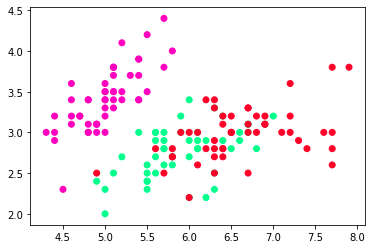

In [75]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=target, cmap='gist_rainbow')

In [86]:
km = KMeans(n_clusters = 3, random_state = 21)

In [93]:
km.fit(df.iloc[:, 0:2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [94]:
centres = km.cluster_centers_
centres

array([[5.77358491, 2.69245283],
       [5.006     , 3.418     ],
       [6.81276596, 3.07446809]])

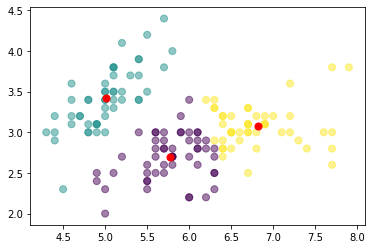

In [95]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=km.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centres[:,0], centres[:,1], c ='red', s = 50)
plt.show()